# STROKE PREDICTION USING MACHINE LEARNING


#### Dataset URL :
--------------
Dataset has been downloaded from Kaggle.
URL:- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


#### Dataset description:
--------------------
Based on input parameters such as gender, age, various diseases, and smoking status,this dataset is used to predict whether a patient is likely to have a stroke. Each row of data contains relevant information about the patient. The stroke data is organised into 12 columns in the dataset.

#### Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


## 1. Data Collection and Initial Analysis

In [1]:
# To import pandas to read the raw data csv file to a dataframe
import pandas as pd

# To import numpy to perform different mathematical operations on arrays
import numpy as np

# Importing matplotlib and seaborn for data visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")

# To manage warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# To Load the data: stroke_data
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
# To print first and last 5 rows of the dataset
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# min, max count avg and percentile details of each column 
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# To understand the data types of the column data
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 2. Data Pre - Processing and Cleaning

In [6]:
stroke_data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# To find the number of missing values in the data set
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# To get the count of values of column 'gender'
stroke_data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
# To remove the unnecessary rows
stroke_data.drop(stroke_data[stroke_data['gender']=='Other'].index,inplace=True)
stroke_data.shape

(5109, 12)

In [10]:
# To replace string values to numerical value
stroke_data.gender.replace({'Male':1,'Female':0},inplace = True)
stroke_data.ever_married.replace({'Yes':1,'No':0},inplace = True)
stroke_data.Residence_type.replace({'Urban':1,'Rural':0},inplace = True)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [11]:
stroke_data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [12]:
#To convert categorical data into dummy variables
stroke_data = pd.get_dummies(stroke_data, columns = ['work_type','smoking_status'])
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,NaN,0,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [13]:
# To show the columns
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [14]:
cols = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']

In [15]:
#SimpleImputer transformer for completing missing values.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.NaN,strategy='mean')
imp = imp.fit(stroke_data)
stroke_data = imp.transform(stroke_data)

In [16]:
stroke_data

array([[9.0460e+03, 1.0000e+00, 6.7000e+01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.1676e+04, 0.0000e+00, 6.1000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.1112e+04, 1.0000e+00, 8.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.9723e+04, 0.0000e+00, 3.5000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.7544e+04, 1.0000e+00, 5.1000e+01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.4679e+04, 0.0000e+00, 4.4000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [17]:
# To assign columns names to the current data
stroke_data = pd.DataFrame(stroke_data,columns = cols)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.60000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,51676.0,0.0,61.0,0.0,0.0,1.0,0.0,202.21,28.89456,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.50000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.40000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1665.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.00000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234.0,0.0,80.0,1.0,0.0,1.0,1.0,83.75,28.89456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5105,44873.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5106,19723.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.60000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,37544.0,1.0,51.0,0.0,0.0,1.0,0.0,166.29,25.60000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
stroke_data.isnull().sum()

id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

## 3. Data Visualization

### 3.1 Univariate Distribution

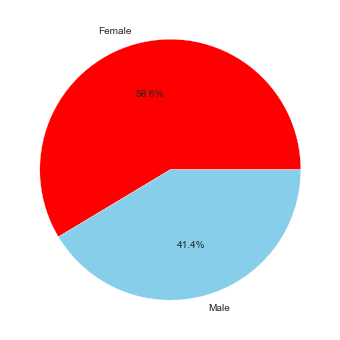

In [19]:
# To plot pie chart for the column 'gender'
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(x=stroke_data.gender.value_counts(),
colors=['red', 'skyblue'],
labels=['Female', 'Male'], autopct='%1.1f%%')
plt.show()

**Findings:
The distribution of gender in the above pie chart shows 41.4 percentage of males and 58.6 percentage of female’s stroke-related statuses are given in the dataset.**

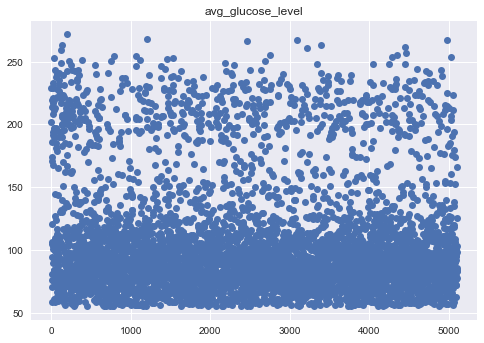

In [20]:
# To plot scatter graph for avgerage glucose level
plt.plot('avg_glucose_level', data=stroke_data, linestyle='none', marker='o')
plt.title('avg_glucose_level')
plt.show()

**Findings:
Scatter plot gives us an idea about the average glucose level of people in the dataset. Here in this plot most of the values are scattered over a range of 60 to 120 which shows most people have an average and below-average glucose level**

Text(0.5, 1.0, 'Distribution of age')

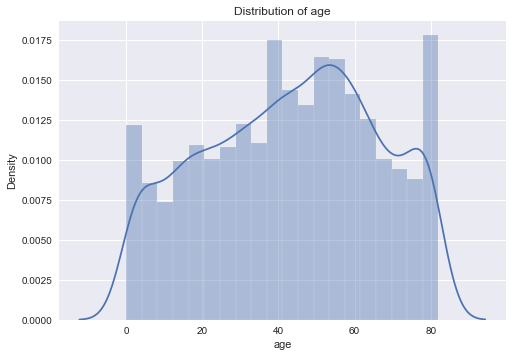

In [21]:
# To plot graph for age distribution
sns.distplot(stroke_data['age'])
plt.title('Distribution of age')

Text(0.5, 1.0, 'Distribution of bmi')

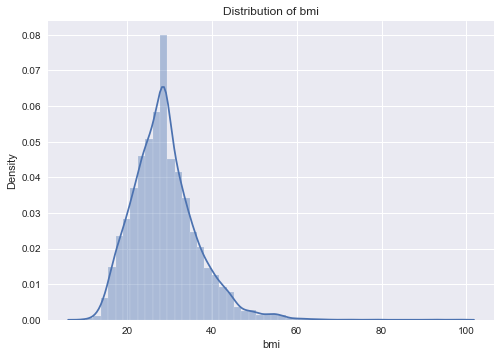

In [22]:
# To plot graph for bmi distribution
sns.distplot(stroke_data['bmi'])
plt.title('Distribution of bmi')

Text(0.5, 1.0, 'Distribution of heart_disease')

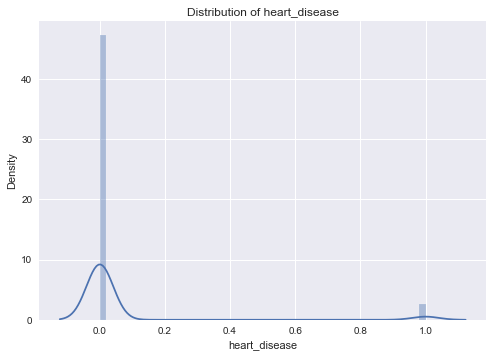

In [23]:
# To plot graph for column heart_disease
sns.distplot(stroke_data['heart_disease'])
plt.title('Distribution of heart_disease')

### 3.2 Multvariate Distribution

<AxesSubplot:ylabel='hypertension'>

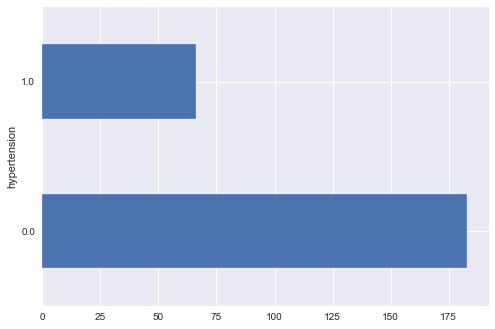

In [24]:
#comparing the relation with hypertension and stroke
stroke_data.groupby('hypertension')['stroke'].sum().plot(kind = 'barh')

<AxesSubplot:ylabel='gender'>

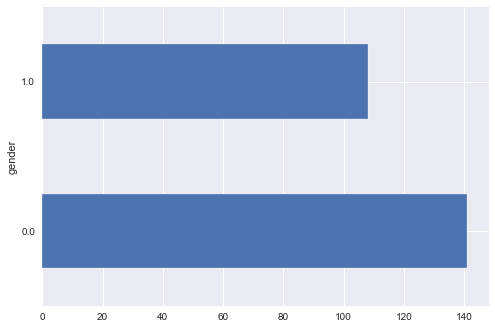

In [25]:
#comparing the relation with gender and stroke
stroke_data.groupby('gender')['stroke'].sum().plot(kind = 'barh')

In [26]:
stroke_data.heart_disease.value_counts()

0.0    4833
1.0     276
Name: heart_disease, dtype: int64

<AxesSubplot:ylabel='heart_disease'>

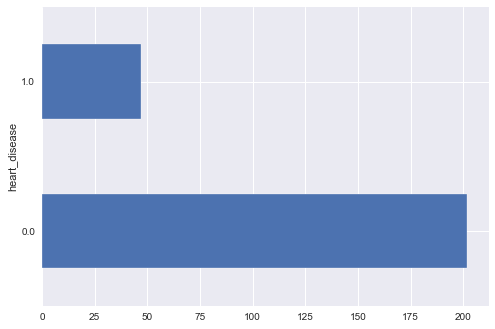

In [27]:
#comparing the relation with heart_disease and stroke
stroke_data.groupby('heart_disease')['stroke'].sum().plot(kind = 'barh')

In [28]:
Age_18_25 = stroke_data.age[(stroke_data.age >= 18)& (stroke_data.age<=25)]
Age_26_35 = stroke_data.age[(stroke_data.age >= 26)& (stroke_data.age<=35)]
Age_36_45 = stroke_data.age[(stroke_data.age >= 36)& (stroke_data.age<=45)]
Age_46_55 = stroke_data.age[(stroke_data.age >= 46)& (stroke_data.age<=55)]
Age_above_55 = stroke_data.age[stroke_data.age >= 56]

In [29]:
agex = ['Age_18_25','Age_26_35','Age_36_45','Age_46_55','Age_above_55']
agey = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_above_55.values)]

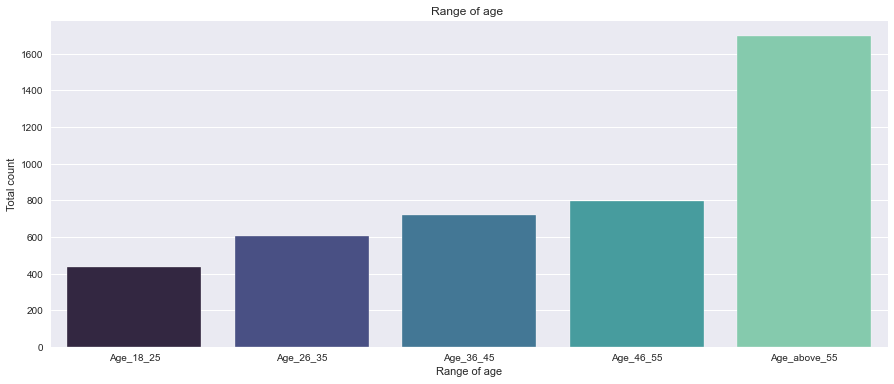

In [30]:
#To plot the range of age
plt.figure(figsize=(15,6))
sns.barplot(x = agex,y = agey , palette='mako')
plt.title("Range of age ")
plt.xlabel(" Range of age ")
plt.ylabel('Total count')
plt.show()

**Findings:
From the above bar graph we can understand that a very high number of the people in this dataset belong to the age group of above 55 years old who are likely to have more chance to get a stroke rather than people below the age group of 55.**

<AxesSubplot:>

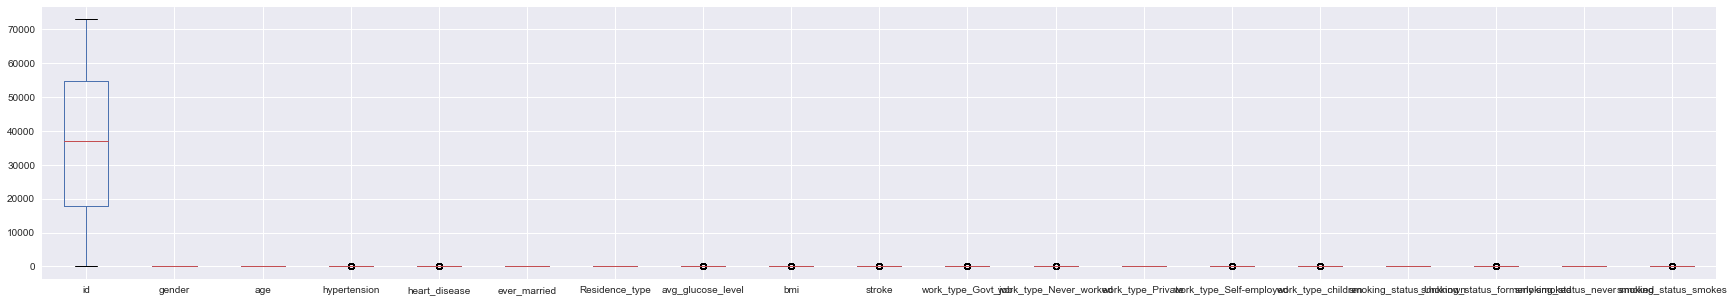

In [31]:
#To plot boxplot for entire columns for checking outliers
plt.figure(figsize=(30,5))
stroke_data.boxplot()

**Findings: The above Box plot is plotted to check the outliers. There were no outliers were found for the columns of the dataset. If there were outliers, by removing them we could increase the accuracy of the machine learning algorithms.**

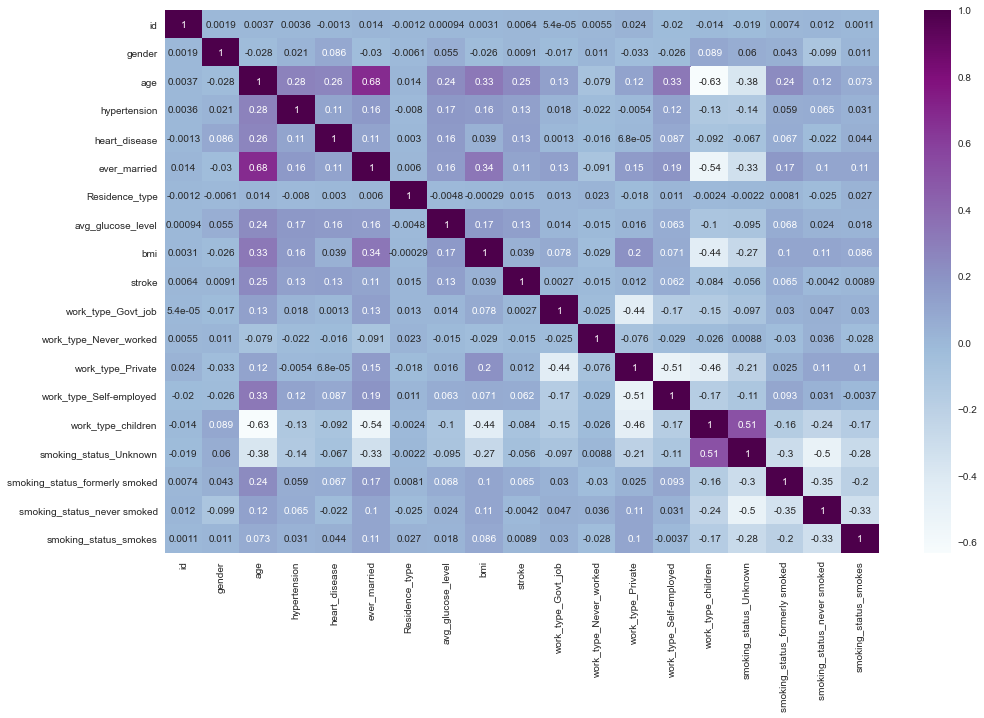

In [32]:
#To visualize relationships between variables
plt.figure(figsize = (16,10))
sns.heatmap(stroke_data.corr(),annot = True,cmap='BuPu')
plt.show()

**Findings:
The above correlation matrix (Fig 11) depicts the relationship between distinct columns. Since we're focusing on the stroke variable, we can see that “gender”, “age”, “hypertension”, “heart disease”, “marital status”, “residence type”, “average glucose level”, “BMI”, “work type govt job”, “work type private”, “work type self-employed”, “smoking status formerly smoked” and “smoking status smokes” all have a positive correlation with Stroke. Because the Correlation matrix displays numbers, it is simple to discern the negative and positive correlation between distinct columns.**

## 4. Applying Algorithms

In [33]:
y = stroke_data['stroke']
X = stroke_data.drop('stroke',axis = 1)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3831, 18)
(1278, 18)
(3831,)
(1278,)


### 4.1 Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
score = {}
model_1 = make_pipeline(StandardScaler(),LogisticRegression())
model_1.fit(X_train,y_train)
score['logistic_Regression'] = model_1.score(X_test,y_test)
predictions = model_1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1210
         1.0       1.00      0.01      0.03        68

    accuracy                           0.95      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.95      0.95      0.92      1278



In [37]:
scaler = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train = scaler.fit_transform(X_train)
y_pred = model_1.predict(scaled_X_test)
confusion_matrix(y_test,y_pred)

array([[1210,    0],
       [  68,    0]], dtype=int64)

### 4.2 KNeighbor Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = make_pipeline(StandardScaler(),KNeighborsClassifier())
model_2.fit(X_train,y_train)
score['KNN'] = model_2.score(X_test,y_test)
predictions = model_2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1210
         1.0       0.00      0.00      0.00        68

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.94      0.92      1278



In [39]:
scaler = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train = scaler.fit_transform(X_train)
y_pred = model_2.predict(scaled_X_test)
confusion_matrix(y_test,y_pred)

array([[1210,    0],
       [  68,    0]], dtype=int64)

### 4.3 Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
model_3 = make_pipeline(StandardScaler(),RandomForestClassifier())
model_3.fit(X_train,y_train)
score['RandomForest'] = model_3.score(X_test,y_test)
predictions = model_3.predict(X_test)

In [41]:
scaler = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train = scaler.fit_transform(X_train)

In [42]:
model_3 = RandomForestClassifier()
model_3.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = model_3.predict(scaled_X_test)
confusion_matrix(y_test,y_pred)

array([[1210,    0],
       [  68,    0]], dtype=int64)

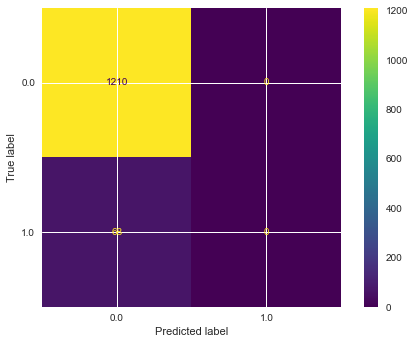

In [44]:
plot_confusion_matrix(model_3,scaled_X_test,y_test);

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1210
         1.0       0.00      0.00      0.00        68

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



### 4.4 XG Boost Classifier

In [46]:
from xgboost import XGBClassifier
model_4 = make_pipeline(StandardScaler(),XGBClassifier())
model_4.fit(X_train,y_train)
score['XGB'] = model_4.score(X_test,y_test)
predictions = model_4.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1210
         1.0       0.31      0.06      0.10        68

    accuracy                           0.94      1278
   macro avg       0.63      0.53      0.53      1278
weighted avg       0.92      0.94      0.92      1278



In [47]:
scaler = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train = scaler.fit_transform(X_train)
y_pred = model_4.predict(scaled_X_test)
confusion_matrix(y_test,y_pred)

array([[1210,    0],
       [  68,    0]], dtype=int64)

## 5. Score Comparison

In [48]:
score

{'logistic_Regression': 0.9475743348982786,
 'KNN': 0.9444444444444444,
 'RandomForest': 0.94679186228482,
 'XGB': 0.9428794992175273}

In [49]:
A = score['logistic_Regression']*100
B = score['KNN']*100
C = score['RandomForest']*100
D = score['XGB']*100

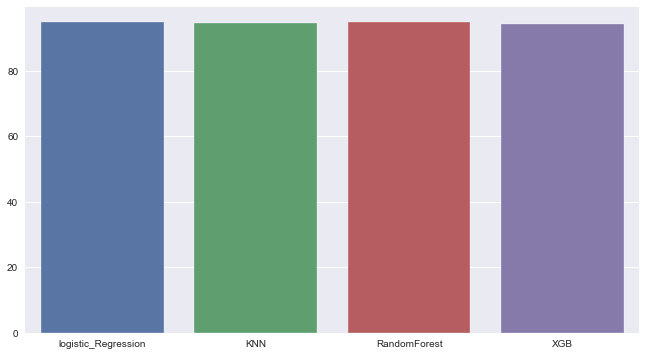

In [50]:
algorithms = ['logistic_Regression','KNN','RandomForest','XGB']
score = [A, B, C, D]
plt.figure(figsize=(11,6))
sns.barplot(algorithms,score)
plt.show()